Microaligner:
https://github.com/VasylVaskivskyi/microaligner

# Improt all necessary libraries

In [1]:
from microaligner import FeatureRegistrator, transform_img_with_tmat
from glob import glob
from dask_image.imread import imread
import matplotlib.pyplot as plt

import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]

In [23]:
# Set up the root directory
root = "/lustre/scratch126/cellgen/team283/tl10/EMBL_training/training/registration/in/"

In [3]:
! ls {root}

NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP1-Cy5_AP1-Cy3_AP1-AF488_AP1-Atto425_Meas9_A02_F1T1_max.ome_31576_demo_cycle1_32867_38083_37146_42065.ome.tif
NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP2-Cy5_AP2-Cy3_AP2-AF488_AP2-Atto425_Meas11_A02_F1T1_max.ome_31670_demo_cycle2_33582_39786_37759_43528.ome.tif
NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP3-Cy5_AP3-Cy3_AP3-AF488_AP3-Atto425_Meas16_A02_F1T1_max.ome_31672_demo_cycle3_34215_39599_38506_43474.ome.tif
NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP4-Cy5_AP4-Cy3_AP4-AF488_AP4-Atto425_Meas18_A02_F1T1_max.ome_31668_demo_cycle4_34426_40028_38796_43910.ome.tif
NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP5-Cy5_AP5-Cy3_AP5-AF488_AP5-Atto425_Meas20_A02_F1T1_max.ome_31669_demo_cycle5_34889_39511_39138_43313.ome.tif
NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP6-Cy5_AP6-Cy3_AP6-AF488_AP6-Atto425_Meas23_A02_F1T1_max.ome_31673_demo_cycle6_33329_39612_37600_43175.ome.tif
NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_Anchor_Background_Background_Background_Meas5_A02_F1T1_max.ome_31671_demo_anc

In [4]:
# Load the reference and moving images
ref_cyc = imread(f"{root}/NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_Anchor_Background_Background_Background_Meas5_A02_F1T1_max.ome_31671_demo_anchor_32477_40268_36712_44382.ome.tif")
moving_cyc = imread(f"{root}/NT_FLW_KR0116_DAHN58.1d-S63_Nucleus_AP1-Cy5_AP1-Cy3_AP1-AF488_AP1-Atto425_Meas9_A02_F1T1_max.ome_31576_demo_cycle1_32867_38083_37146_42065.ome.tif")

In [5]:
ref_cyc.shape, moving_cyc.shape

((5, 4114, 4234), (5, 3981, 4278))

In [7]:
min_x = min(ref_cyc.shape[1], moving_cyc.shape[1]) # the minimum Y size
min_y = min(ref_cyc.shape[2], moving_cyc.shape[2]) # the minimum X size

In [8]:
ref_DAPI = ref_cyc[0] # DAPI is the first channel
ref_anchor = ref_cyc[1] # Anchor is the second channel
moving_DAPI = moving_cyc[0] # DAPI is the first channel

(-0.5, 4277.5, 3980.5, -0.5)

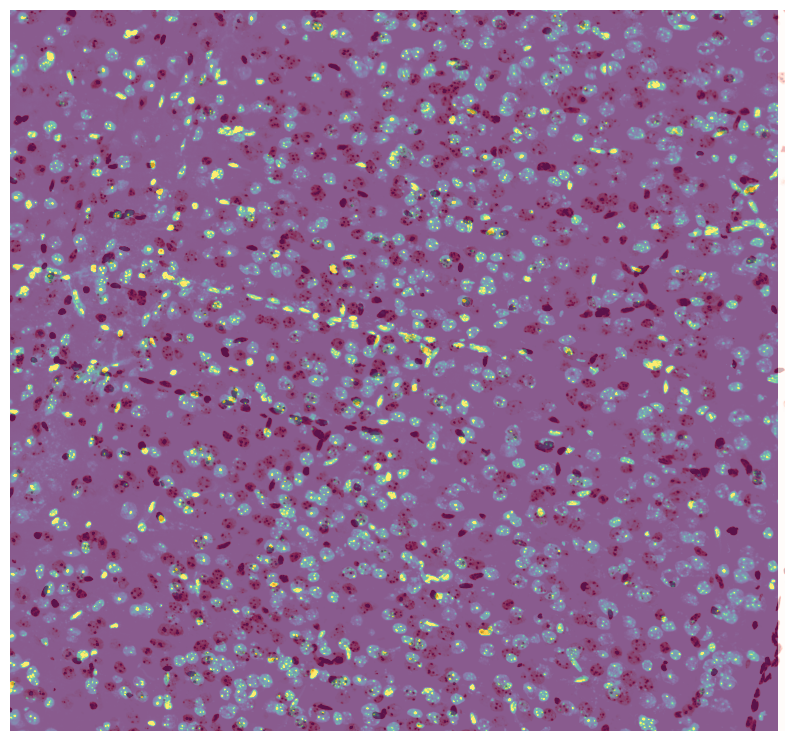

In [9]:
# Show misaligned images
plt.imshow(ref_DAPI, cmap='viridis', alpha=0.9, vmin=180, vmax=2000)
plt.imshow(moving_DAPI, cmap='Reds', alpha=0.3, vmin=180, vmax=2000)
plt.axis('off')

In [24]:
ref_DAPI = ref_DAPI[:min_x, :min_y] # crop the reference image
moving_DAPI = moving_DAPI[:min_x, :min_y] # crop the moving image

In [11]:
ref_DAPI.shape, moving_DAPI.shape

((3981, 4234), (3981, 4234))

(-0.5, 4233.5, 3980.5, -0.5)

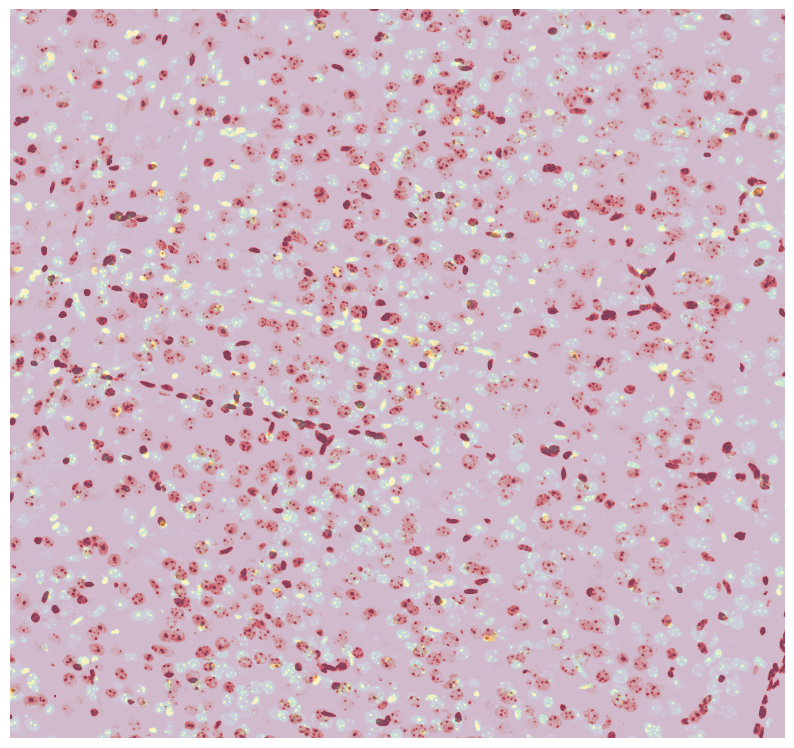

In [12]:
plt.imshow(ref_DAPI, cmap='viridis', alpha=0.5, vmin=180, vmax=2000)
plt.imshow(moving_DAPI, cmap='Reds', alpha=0.5, vmin=180, vmax=2000)
plt.axis('off')

In [13]:
# Register the images using the FeatureRegistrator
freg = FeatureRegistrator()
freg.ref_img = ref_DAPI.compute()
freg.mov_img = moving_DAPI.compute()
transformation_matrix = freg.register()

img2_feature_reg_aligned = transform_img_with_tmat(moving_cyc[0].compute(), moving_cyc[0].shape, transformation_matrix)

Pyramid factor 8
    Iteration 1 / 3
    Good matches 586 / 3608
    MI score after: 0.3104254470832193 | MI score before: 0.01530921428476728
    Better alignment than before
    Iteration 2 / 3
    Good matches 820 / 2942
    MI score after: 0.3179151056963892 | MI score before: 0.3104254470832193
    Better alignment than before
    Iteration 3 / 3
    Good matches 823 / 2941
    MI score after: 0.3173015384141412 | MI score before: 0.318403766469039
    Worse alignment than before
Pyramid factor 4
    Iteration 1 / 3
    Good matches 1272 / 5420
    MI score after: 0.35228797548197255 | MI score before: 0.35176242181450335
    Better alignment than before
    Iteration 2 / 3
    Good matches 1256 / 5412
    MI score after: 0.3523055897799105 | MI score before: 0.35228797548197255
    Better alignment than before
    Iteration 3 / 3
    Good matches 1254 / 5439
    MI score after: 0.3453985910867821 | MI score before: 0.35213798055823337
    Worse alignment than before
Pyramid facto

In [14]:
# Apply the transformation matrix to the other channels in the moving cycle
another_feature_reg_aligned = transform_img_with_tmat(moving_cyc[1].compute(), moving_cyc[0].shape, transformation_matrix)

(-0.5, 4277.5, 3980.5, -0.5)

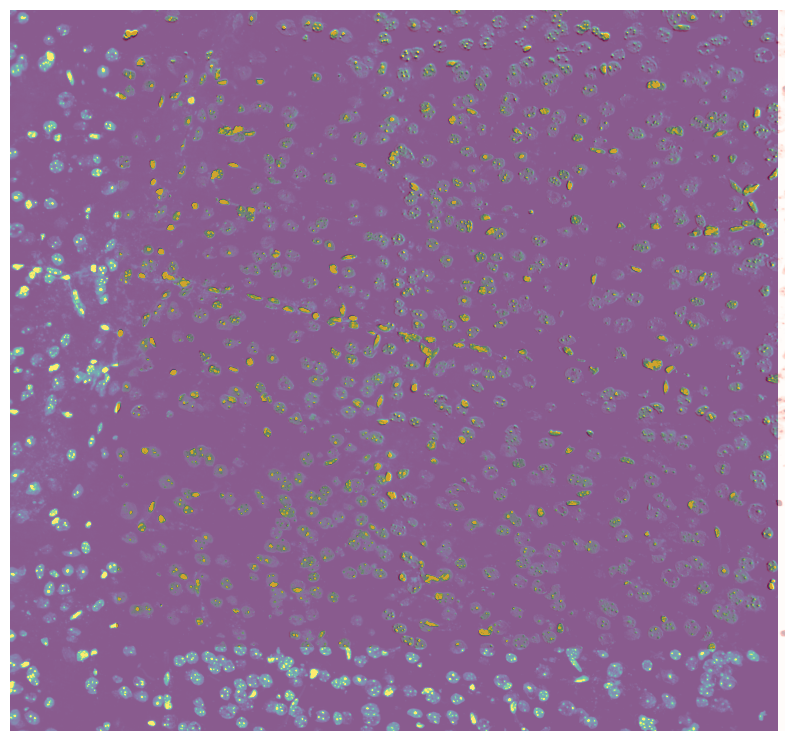

In [15]:
plt.imshow(ref_DAPI, cmap='viridis', alpha=0.9, vmin=180, vmax=2000)
plt.imshow(img2_feature_reg_aligned, cmap='Reds', alpha=0.3, vmin=180, vmax=2000)
plt.axis('off')

In [16]:
ref_DAPI.shape, img2_feature_reg_aligned.shape

((3981, 4234), (3981, 4278))

# Optical flow registration

In [17]:
img2_feature_reg_aligned = img2_feature_reg_aligned[:min_x, :min_y] # crop the registered DAPI image
another_feature_reg_aligned = another_feature_reg_aligned[:min_x, :min_y] # crop the registered Anchor image

In [18]:
# Register image with optical flow algorithm
from microaligner import OptFlowRegistrator, Warper 
ofreg = OptFlowRegistrator()
ofreg.ref_img = ref_DAPI.compute()
ofreg.mov_img = img2_feature_reg_aligned
flow_map = ofreg.register()

warper = Warper()
warper.image = img2_feature_reg_aligned
warper.flow = flow_map
img2_optflow_reg_aligned = warper.warp()

Pyramid factor 16
    MI score after: 0.2502652883861169 | MI score before: 0.24699604120171664
    Better alignment than before
Pyramid factor 8
    MI score after: 0.33907748209574345 | MI score before: 0.31891030835391077
    Better alignment than before
Pyramid factor 4
    MI score after: 0.407327195651006 | MI score before: 0.3521126030801732
    Better alignment than before
Pyramid factor 2
    MI score after: 0.35099384091155655 | MI score before: 0.28849437777877707
    Better alignment than before


In [25]:
flow_map.shape, img2_optflow_reg_aligned.shape

((3981, 4234, 2), (3981, 4234))

(-0.5, 4233.5, 3980.5, -0.5)

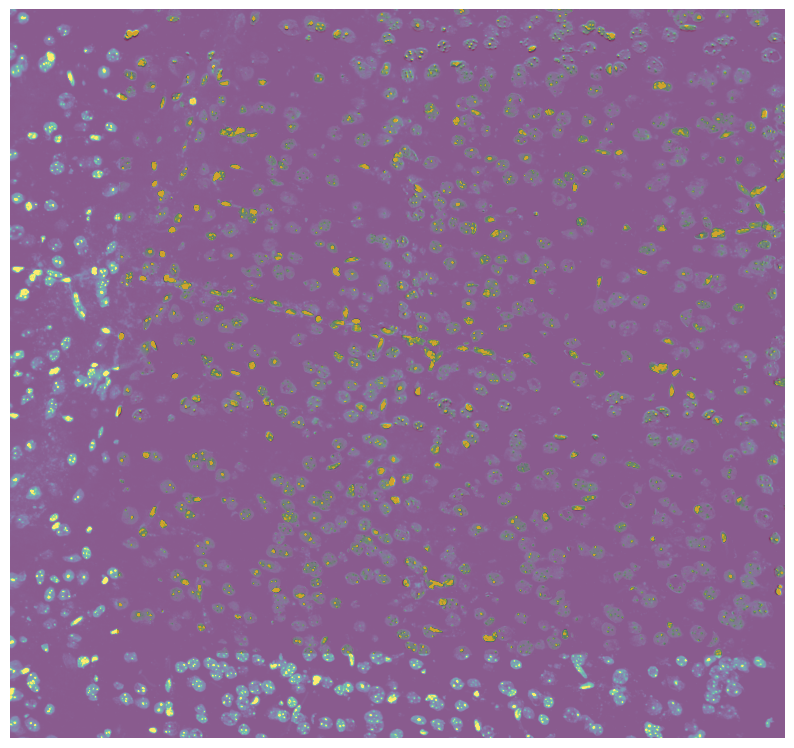

In [20]:
plt.imshow(ref_DAPI, cmap='viridis', alpha=0.9, vmin=180, vmax=2000)
plt.imshow(img2_optflow_reg_aligned, cmap='Reds', alpha=0.3, vmin=180, vmax=2000)
plt.axis('off')

# Wrap another channel

In [26]:
warper = Warper()
warper.image = another_feature_reg_aligned
warper.flow = flow_map
another_optflow_reg_aligned = warper.warp()

(-0.5, 4233.5, 3980.5, -0.5)

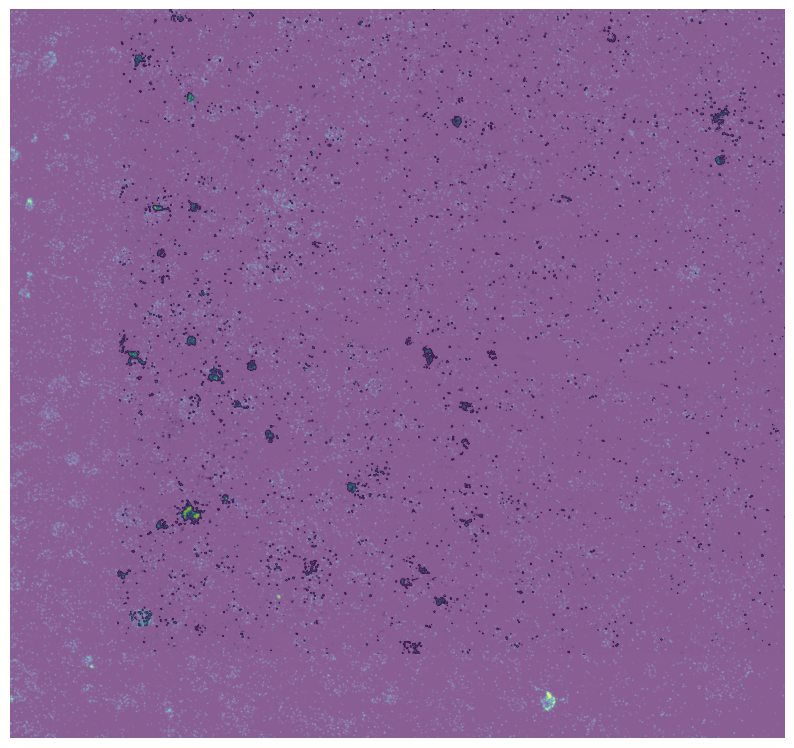

In [22]:
plt.imshow(ref_anchor, cmap='viridis', alpha=0.9, vmin=180)
plt.imshow(another_optflow_reg_aligned, cmap='Greys', alpha=0.3, vmin=180, vmax=2000)
plt.axis('off')